### Import Required Libraries

In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# warnings.filterwarnings('ignore')

# %matplotlib inline

### Data collection

In [38]:
df = pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Data Information

In [73]:
df.shape

(150, 5)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [75]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [76]:
df.axes

[RangeIndex(start=0, stop=150, step=1),
 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
        'species'],
       dtype='object')]

In [77]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [78]:
df["species"].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [79]:
df["species"].nunique()

3

In [80]:
df["species"].unique()

array([0, 1, 2], dtype=int64)

In [81]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Classes are balanced

<Axes: xlabel='species', ylabel='count'>

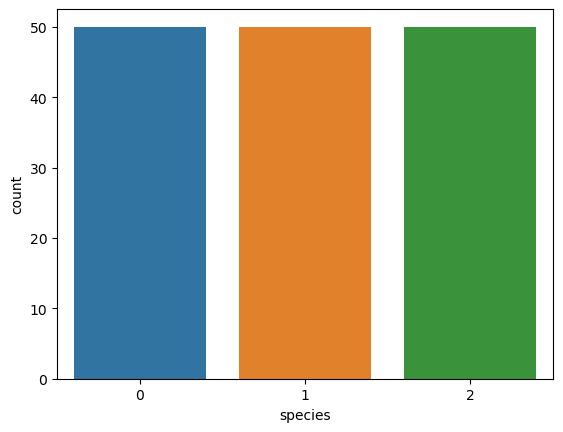

In [82]:
sns.countplot(x=df["species"])

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [84]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [85]:
df['species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}, inplace = True)

### Splitting Dataset 

In [86]:
x=df.drop("species",axis=1)
y=df["species"]

In [87]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [88]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

### Model Training

In [92]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=3,stratify=y)

In [93]:
print('Shape of x_train is : ', x_train.shape)
print('Shape of x_test is : ',  x_test.shape)
print('Shape of y_train is : ', y_train.shape)
print('Shape of y_test is : ',  y_test.shape)

Shape of x_train is :  (105, 4)
Shape of x_test is :  (45, 4)
Shape of y_train is :  (105,)
Shape of y_test is :  (45,)


### Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
model = LogisticRegression()
model

LogisticRegression()

In [96]:
model.fit(x_train,y_train)

LogisticRegression()

In [97]:
y_pred=model.predict(x_test)

In [98]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [99]:
y_pred=model.predict(x_test)
y_pred

array([0, 2, 0, 1, 1, 2, 0, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2,
       2, 0, 0, 1, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2,
       1], dtype=int64)

In [100]:
y_test[5:10]

135    2
8      0
68     1
134    2
86     1
Name: species, dtype: int64

In [101]:
y_pred[5:10]

array([2, 0, 1, 2, 1], dtype=int64)

In [102]:
cnf_matrix=confusion_matrix(y_test,y_pred)
cnf_matrix

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  1, 14]], dtype=int64)

In [103]:
clf_report=classification_report(y_test,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.87      0.90        15
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [104]:
# Traing Data Evaluation
y_pred_train=model.predict(x_train)

cnf_matrix=confusion_matrix(y_train,y_pred_train)
print(cnf_matrix)



[[35  0  0]
 [ 0 34  1]
 [ 0  1 34]]


In [105]:
acc_score=accuracy_score(y_train,y_pred_train)
print('Accuracy Score is : ',acc_score)
print()
print() 


Accuracy Score is :  0.9809523809523809




In [106]:
clf_report=classification_report(y_train,y_pred_train)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      0.97      0.97        35
           2       0.97      0.97      0.97        35

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



In [107]:
# Testing Data Evaluation
y_pred=model.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred)
print(cnf_matrix)
print()
print()

acc_score=accuracy_score(y_test,y_pred)
print('Accuracy Score is : ',acc_score)
print()
print() 

clf_report=classification_report(y_test,y_pred)
print(clf_report)

[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]


Accuracy Score is :  0.9333333333333333


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.87      0.90        15
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [108]:
model.score(x,y)

0.9666666666666667

In [109]:
acc_score

0.9333333333333333